In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import sys

sys.path.insert(0, '../src')

# Set the working directory to the root of the project
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
os.chdir(parent_dir)

print(f'Current working directory: {os.getcwd()}')


Current working directory: /home/jprodanov/resource-elastisity-nancy


In [2]:
algorithms = ['thold', 'dqn', 'ppo', 'ddpg']
# algorithms = [ 'dqn', 'ppo', 'ddpg']
# folder = 'results/generated/scalable_agents'
folder = 'results/generated/scalable_agents/21iterations'
# folder = 'results/generated/scalable_agents/current_in_paper'

mean_crec_alg = pickle.load(open(f'{folder}/mean_crec_alg.p', 'rb'))
mean_rts_alg = pickle.load(open(f'{folder}/mean_rts_alg.p', 'rb'))



In [3]:
mean_rts_alg['ppo'][4] = np.nan_to_num(np.array(mean_rts_alg['ppo'][4]), nan=2)

In [8]:
mean_rts_alg = pickle.load(open(f'{folder}/21iterations/mean_rts_alg.p', 'rb'))

In [9]:
all_response_times = pickle.load(open(f'{folder}/all_response_times.p', 'rb'))

In [5]:
ppo_deltas = pickle.load(open(f'{folder}/ppo_deltas.p', 'rb'))
dqn_deltas = pickle.load(open(f'{folder}/dqn_deltas.p', 'rb'))
ddpg_deltas = pickle.load(open(f'{folder}/ddpg_deltas.p', 'rb'))

In [6]:
deltas_0 = pickle.load(open(f'{folder}/deltas_0.p', 'rb'))
deltas_1 = pickle.load(open(f'{folder}/deltas_1.p', 'rb'))
deltas_2 = pickle.load(open(f'{folder}/deltas_2.p', 'rb'))
deltas_3 = pickle.load(open(f'{folder}/deltas_3.p', 'rb'))

In [7]:
response_times_part1 = pickle.load(open(f'{folder}/response_times_part1.p', 'rb'))
response_times_part2 = pickle.load(open(f'{folder}/response_times_part2.p', 'rb'))
response_times_part3 = pickle.load(open(f'{folder}/response_times_part3.p', 'rb'))
response_times_part4 = pickle.load(open(f'{folder}/response_times_part4.p', 'rb'))

In [39]:
print(f"Service 1 for all parts: {[np.mean(np.array(deltas_0['thold'])[i::4], axis=0) for i in range(4)]}")
print(f"Service 2 for all parts: {[np.mean(np.array(deltas_1['thold'])[i::4], axis=0) for i in range(4)]}")
print(f"Service 3 for all parts: {[np.mean(np.array(deltas_2['thold'])[i::4], axis=0) for i in range(4)]}")
print(f"Service 4 for all parts: {[np.mean(np.array(deltas_3['thold'])[i::4], axis=0) for i in range(4)]}")

Service 1 for all parts: [200.0, 28.571428571428573, 2.380952380952381, 122.61904761904762]
Service 2 for all parts: [247.61904761904762, 44.04761904761905, 1.1904761904761905, 4.761904761904762]
Service 3 for all parts: [39.285714285714285, 304.76190476190476, 5.9523809523809526, 41.666666666666664]
Service 4 for all parts: [28.571428571428573, 17.857142857142858, 7.142857142857143, 195.23809523809524]


In [12]:
# print(np.mean(response_times_part1['dqn'][1]))
# print(np.mean(response_times_part1['ppo'][1]))
# print(np.mean(response_times_part1['ddpg'][1]))
print(np.mean(response_times_part2['thold'][3]))

0.2696745971867008


In [53]:
for alg in algorithms:
    print(alg)
    for service in range(4):
        percentage_below_025 = (np.sum(np.array(response_times_part1[alg][service + 1]) > 0.25) / 
                                len(response_times_part1[alg][service + 1])) * 100
        print(f"PART1: {percentage_below_025:.2f}% of response times less more 0.25s for service {service}")
        percentage_below_025 = (np.sum(np.array(response_times_part2[alg][service + 1]) > 0.25) / 
                                len(response_times_part2[alg][service + 1])) * 100
        print(f"PART2: {percentage_below_025:.2f}% of response times less more 0.25s for service {service}")
        percentage_below_025 = (np.sum(np.array(response_times_part3[alg][service + 1]) > 0.25) / 
                                len(response_times_part3[alg][service + 1])) * 100
        print(f"PART3: {percentage_below_025:.2f}% of response times less more 0.25s for service {service}")
        percentage_below_025 = (np.sum(np.array(response_times_part4[alg][service + 1]) > 0.25) / 
                                len(response_times_part4[alg][service + 1])) * 100
        print(f"PART4: {percentage_below_025:.2f}% of response times less more 0.25s for service {service}")

thold
PART1: 8.69% of response times less more 0.25s for service 0
PART2: 0.00% of response times less more 0.25s for service 0
PART3: 0.00% of response times less more 0.25s for service 0
PART4: 9.59% of response times less more 0.25s for service 0
PART1: 5.52% of response times less more 0.25s for service 1
PART2: 0.00% of response times less more 0.25s for service 1
PART3: 0.00% of response times less more 0.25s for service 1
PART4: 0.00% of response times less more 0.25s for service 1
PART1: 5.57% of response times less more 0.25s for service 2
PART2: 23.40% of response times less more 0.25s for service 2
PART3: 0.32% of response times less more 0.25s for service 2
PART4: 0.00% of response times less more 0.25s for service 2
PART1: 13.89% of response times less more 0.25s for service 3
PART2: 5.06% of response times less more 0.25s for service 3
PART3: 81.90% of response times less more 0.25s for service 3
PART4: 18.67% of response times less more 0.25s for service 3
dqn
PART1: 7.6

In [40]:
proccessed_dqn_deltas = [arr[1:] + [0] * (4 - len(arr[1:])) for arr in dqn_deltas]
average_dqn_deltas = [np.mean(np.array(proccessed_dqn_deltas)[i::4], axis=0) for i in range(4)]
for i, avg in enumerate(average_dqn_deltas):
    print(f"Average for PART {i + 1}: {avg}")

Average for PART 1: [380.95238095 410.71428571   0.           0.        ]
Average for PART 2: [450.         475.         370.23809524   0.        ]
Average for PART 3: [130.95238095 244.04761905 261.9047619  139.28571429]
Average for PART 4: [ 98.80952381 142.85714286 115.47619048   0.        ]


In [41]:
proccessed_ppo_deltas = [arr[1:] + [0] * (4 - len(arr[1:])) for arr in ppo_deltas]
average_ppo_deltas = [np.mean(np.array(proccessed_ppo_deltas)[i::4], axis=0) for i in range(4)]
for i, avg in enumerate(average_ppo_deltas):
    print(f"Average for PART {i + 1}: {avg}")

Average for PART 1: [295.46265469 372.02629238   0.           0.        ]
Average for PART 2: [101.54419831  96.03736939 237.18757075   0.        ]
Average for PART 3: [147.09175264 170.55728647 175.51052047  66.22447368]
Average for PART 4: [ 35.25243998  37.5084819  169.53662393   0.        ]


In [42]:
proccessed_ddpg_deltas = [arr[1:] + [0] * (4 - len(arr[1:])) for arr in ddpg_deltas]
average_ddpg_deltas = [np.mean(np.array(proccessed_ddpg_deltas)[i::4], axis=0) for i in range(4)]
for i, avg in enumerate(average_ddpg_deltas):
    print(f"Average for PART {i + 1}: {avg}")

Average for PART 1: [906.54637837 944.10121858   0.           0.        ]
Average for PART 2: [475.73262502 491.47754358 395.95231639   0.        ]
Average for PART 3: [122.95193984  94.44864368  51.34285678   4.80757818]
Average for PART 4: [179.65728543 196.86571108 189.96052662   0.        ]


In [10]:
print(f"Mean Deltas for heuristic algorithm")
print(f"Service 1: {np.mean(deltas_0['thold'])}")
print(f"Service 2: {np.mean(deltas_1['thold'])}")
print(f"Service 3: {np.mean(deltas_2['thold'])}")
print(f"Service 4: {np.mean(deltas_3['thold'])}")

Mean Deltas for heuristic algorithm
Service 1: 88.39285714285714
Service 2: 74.4047619047619
Service 3: 97.91666666666667
Service 4: 62.20238095238095


In [51]:
for service in range(4):
    print(f'Service {service}')
    print(f'PPO: {np.mean(np.array(ppo_deltas)[:, service])}')
    print(f'DQN: {np.mean(np.array(dqn_deltas)[:, service])}')
    print(f'DDPG: {np.mean(np.array(ddpg_deltas)[:, service])}')

Service 0
PPO: 551.0838943400553
DQN: 944.047619047619
DDPG: 1456.1347877997573
Service 1
PPO: 662.170117570176
DQN: 1183.3333333333333
DDPG: 1746.9029829917763
Service 2
PPO: 435.12762018612455
DQN: 751.1904761904761
DDPG: 542.0710101723671
Service 3
PPO: 232.47076625980083
DQN: 236.9047619047619
DDPG: 169.8335993857611


In [5]:
def calculate_changes(data, service_index):
    cpu_limits = [entry[service_index][0] for entry in data]
    return np.sum(np.abs(np.diff(cpu_limits)))

for alg in algorithms:
    print(alg)
    for service_index in range(4):
        changes = calculate_changes(mean_crec_alg[alg], service_index)
        print(f"Change in CPU limits for service {service_index + 1}: {changes:.2f}")

thold
Change in CPU limits for service 1: 460.00
Change in CPU limits for service 2: 292.50
Change in CPU limits for service 3: 347.50
Change in CPU limits for service 4: 235.00
dqn
Change in CPU limits for service 1: 650.00
Change in CPU limits for service 2: 747.50
Change in CPU limits for service 3: 510.00
Change in CPU limits for service 4: 230.00
ppo
Change in CPU limits for service 1: 612.40
Change in CPU limits for service 2: 648.00
Change in CPU limits for service 3: 396.40
Change in CPU limits for service 4: 208.10
ddpg
Change in CPU limits for service 1: 966.20
Change in CPU limits for service 2: 706.50
Change in CPU limits for service 3: 365.70
Change in CPU limits for service 4: 130.80


In [35]:
baseline_mean = np.mean(np.array(list(mean_rts_alg['thold'].values())).flatten())
print(f"Baseline mean response time for service 4: {baseline_mean:.2f}s")
for alg in mean_rts_alg:
    if alg == 'thold':
        continue
    alg_mean = np.mean(np.array(list(mean_rts_alg[alg].values())).flatten())
    improvement = ((baseline_mean - alg_mean) / baseline_mean) * 100
    print(f"ALG {alg} has mean of {alg_mean:.2f}s response times")
    print(f"Percentage improvement over baseline: {improvement:.2f}%")

Baseline mean response time for service 4: 0.18s
ALG ppo has mean of 0.17s response times
Percentage improvement over baseline: 6.90%
ALG dqn has mean of 0.11s response times
Percentage improvement over baseline: 37.19%
ALG ddpg has mean of 0.25s response times
Percentage improvement over baseline: -40.93%


In [34]:
baseline_mean = np.mean(np.array(list(mean_rts_alg['thold'][4])).flatten())
print(f"Baseline mean for service 4: {baseline_mean:.2f}s")
for alg in mean_rts_alg:
    if alg == 'thold':
        continue
    alg_mean = np.mean(np.array(list(mean_rts_alg[alg][4])).flatten())
    improvement = ((baseline_mean - alg_mean) / baseline_mean) * 100
    print(f"ALG {alg} has mean of {alg_mean:.2f}s response times")
    print(f"Percentage improvement over baseline for service 4: {improvement:.2f}%")

Baseline mean for service 4: 0.53s
ALG ppo has mean of 0.45s response times
Percentage improvement over baseline for service 4: 15.26%
ALG dqn has mean of 0.24s response times
Percentage improvement over baseline for service 4: 53.87%
ALG ddpg has mean of 0.79s response times
Percentage improvement over baseline for service 4: -49.63%


In [52]:
for alg in algorithms:
    print(f"ALG {alg} has mean of {np.mean(np.array(list(mean_rts_alg[str(alg)].values())).flatten())}s "
          f"response times")

ALG thold has mean of 0.18036406578373015s response times
ALG dqn has mean of 0.11329055819444443s response times
ALG ppo has mean of nans response times
ALG ddpg has mean of 0.2541919144874339s response times


In [8]:
recordings = 60
first = (recordings // 4)
second = first * 2
third = first * 3



In [51]:
for alg in algorithms:
    for service in range(4):
        print(f"{alg}")

        mean_rts = mean_rts_alg[alg][service + 1][first:second]
        mean_rts = np.nan_to_num(mean_rts, nan=2)
        print(f" mean of {np.mean(mean_rts):.2f}s response times for service {service} ")

        # percentage_below_025 = (np.sum(np.array(all_response_times[alg][service + 1]) > 0.25) / 
                                # len(all_response_times[alg][service + 1])) * 100

        # percentage_below_025 = (np.sum(np.array(mean_rts_alg[alg][service + 1]) > 0.25) / 
        #                         len(mean_rts_alg[alg][service + 1])) * 100
        # print(f" {percentage_below_025:.2f}% of response times less more 0.25s for service {service}")

        # match alg:
        #     case 'thold':
        #         match service:
        #             case 0:
        #                 deltas = deltas_0[alg]
        #             case 1:
        #                 deltas = deltas_1[alg]
        #             case 2:
        #                 deltas = deltas_2[alg]
        #     case 'dqn':
        #         deltas = dqn_deltas
        #     case 'ppo':
        #         deltas = ppo_deltas
        #     case 'ddpg':
        #         deltas = ddpg_deltas
        
        # if alg == 'thold':
        #     # deltas = deltas[second:third]
        #     print(f"Mean Deltas for heuristic algorithm {np.mean(deltas):.2f}s")
        # else:
        #     print(f"Mean Deltas for {alg} algorithm {np.mean(np.array(deltas)[:, service]):.2f}s")

        print()


thold
 mean of 0.02s response times for service 0 

thold
 mean of 0.02s response times for service 1 

thold
 mean of 0.25s response times for service 2 

thold
 mean of 0.10s response times for service 3 

dqn
 mean of 0.02s response times for service 0 

dqn
 mean of 0.02s response times for service 1 

dqn
 mean of 0.25s response times for service 2 

dqn
 mean of 0.11s response times for service 3 

ppo
 mean of 0.02s response times for service 0 

ppo
 mean of 0.02s response times for service 1 

ppo
 mean of 0.33s response times for service 2 

ppo
 mean of 0.12s response times for service 3 

ddpg
 mean of 0.02s response times for service 0 

ddpg
 mean of 0.02s response times for service 1 

ddpg
 mean of 0.36s response times for service 2 

ddpg
 mean of 0.12s response times for service 3 



In [4]:
from matplotlib import rc
from matplotlib.ticker import FuncFormatter

rc('text', usetex=True)
rc('font', **{'family': 'serif', 'serif': ['Times New Roman']})

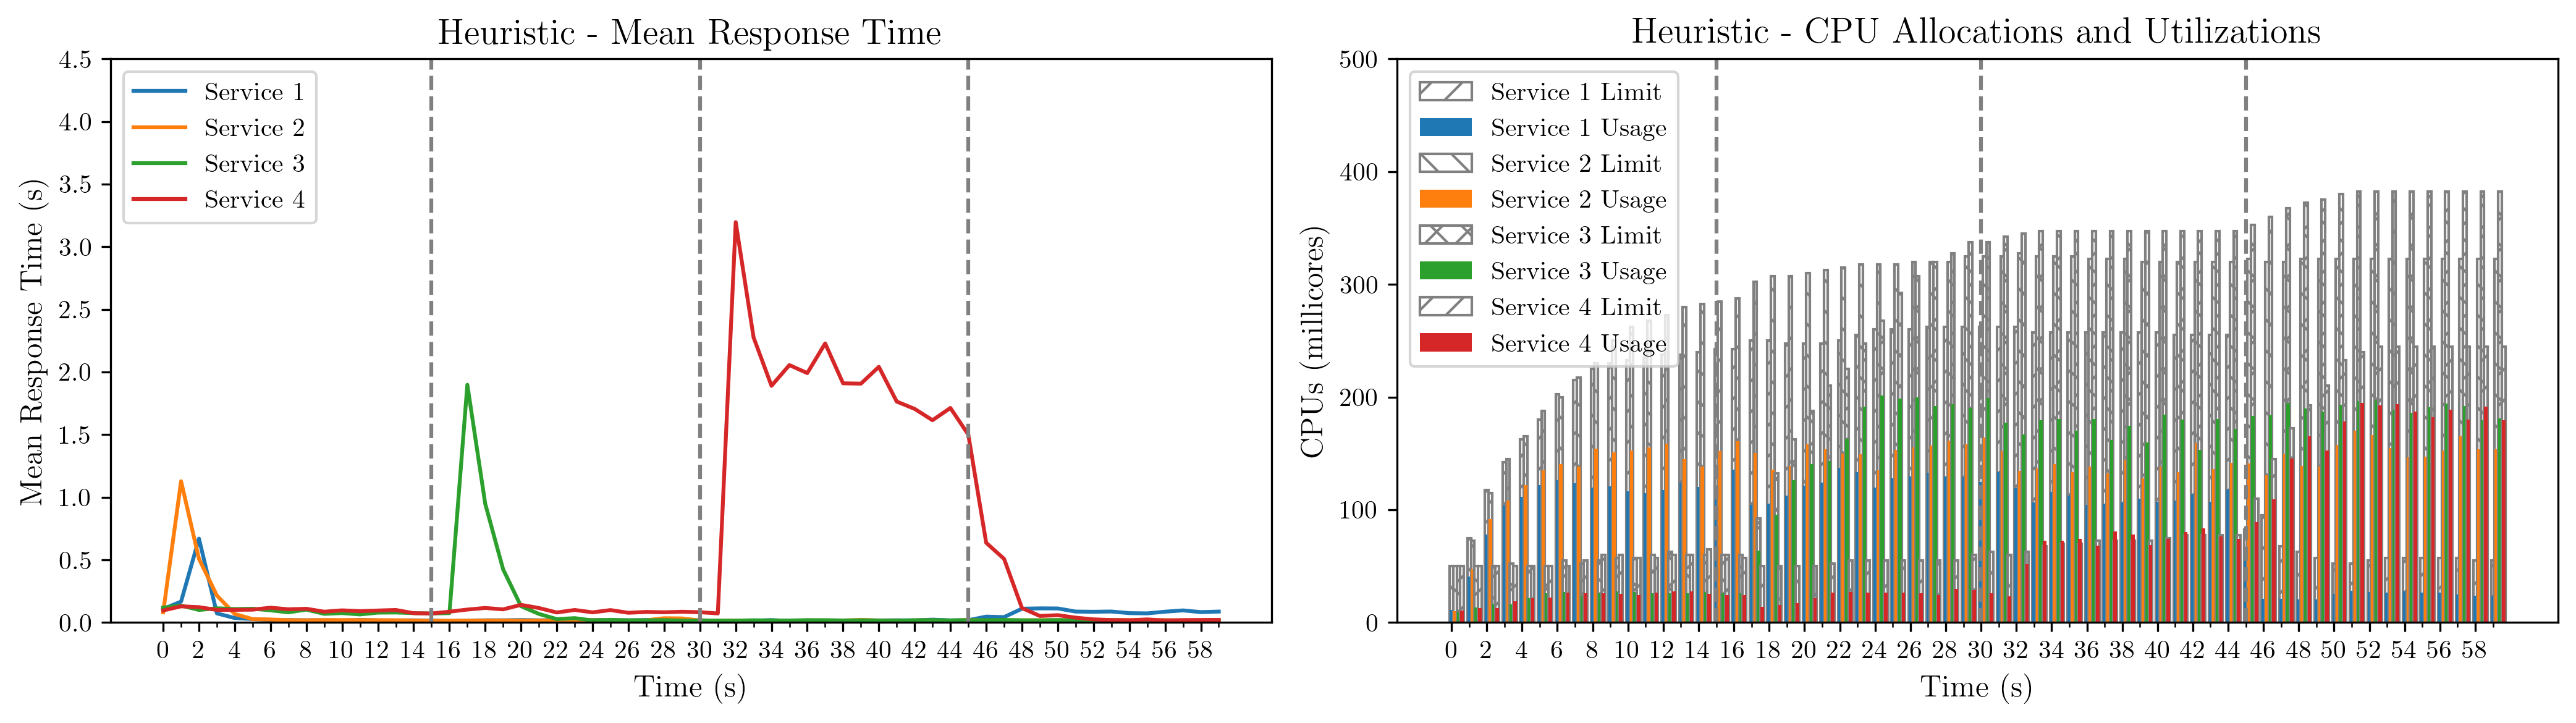

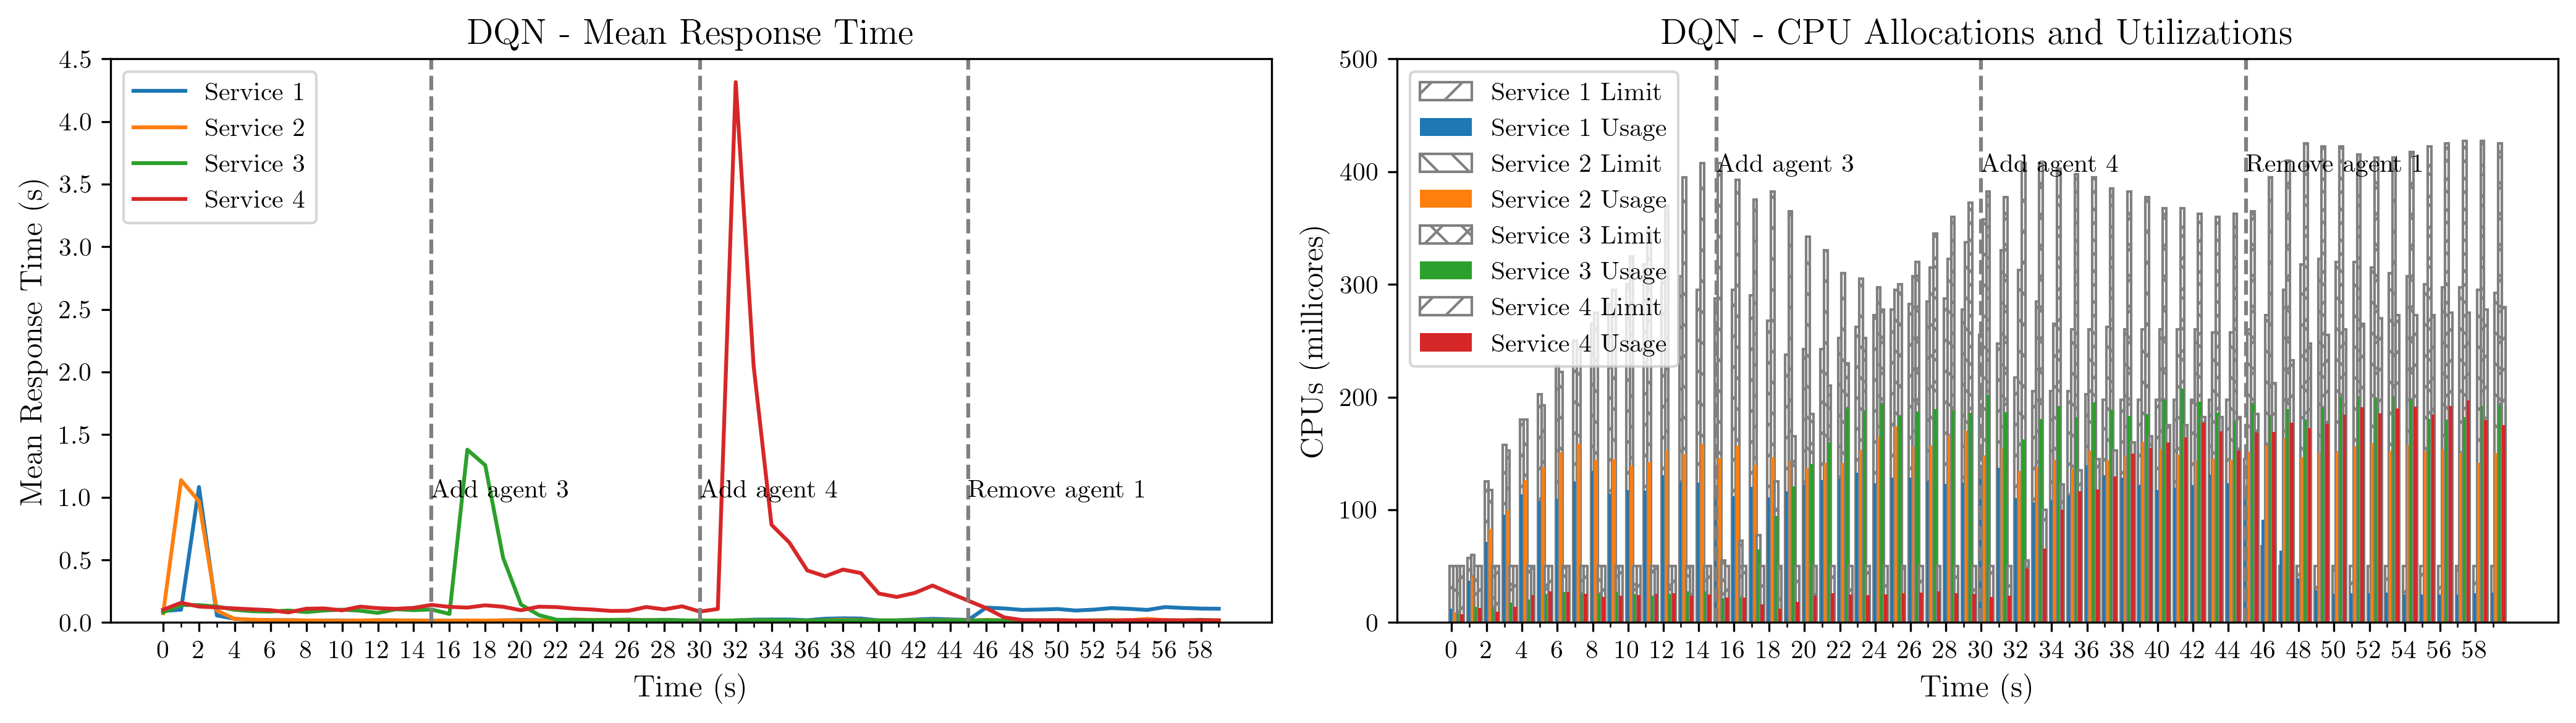

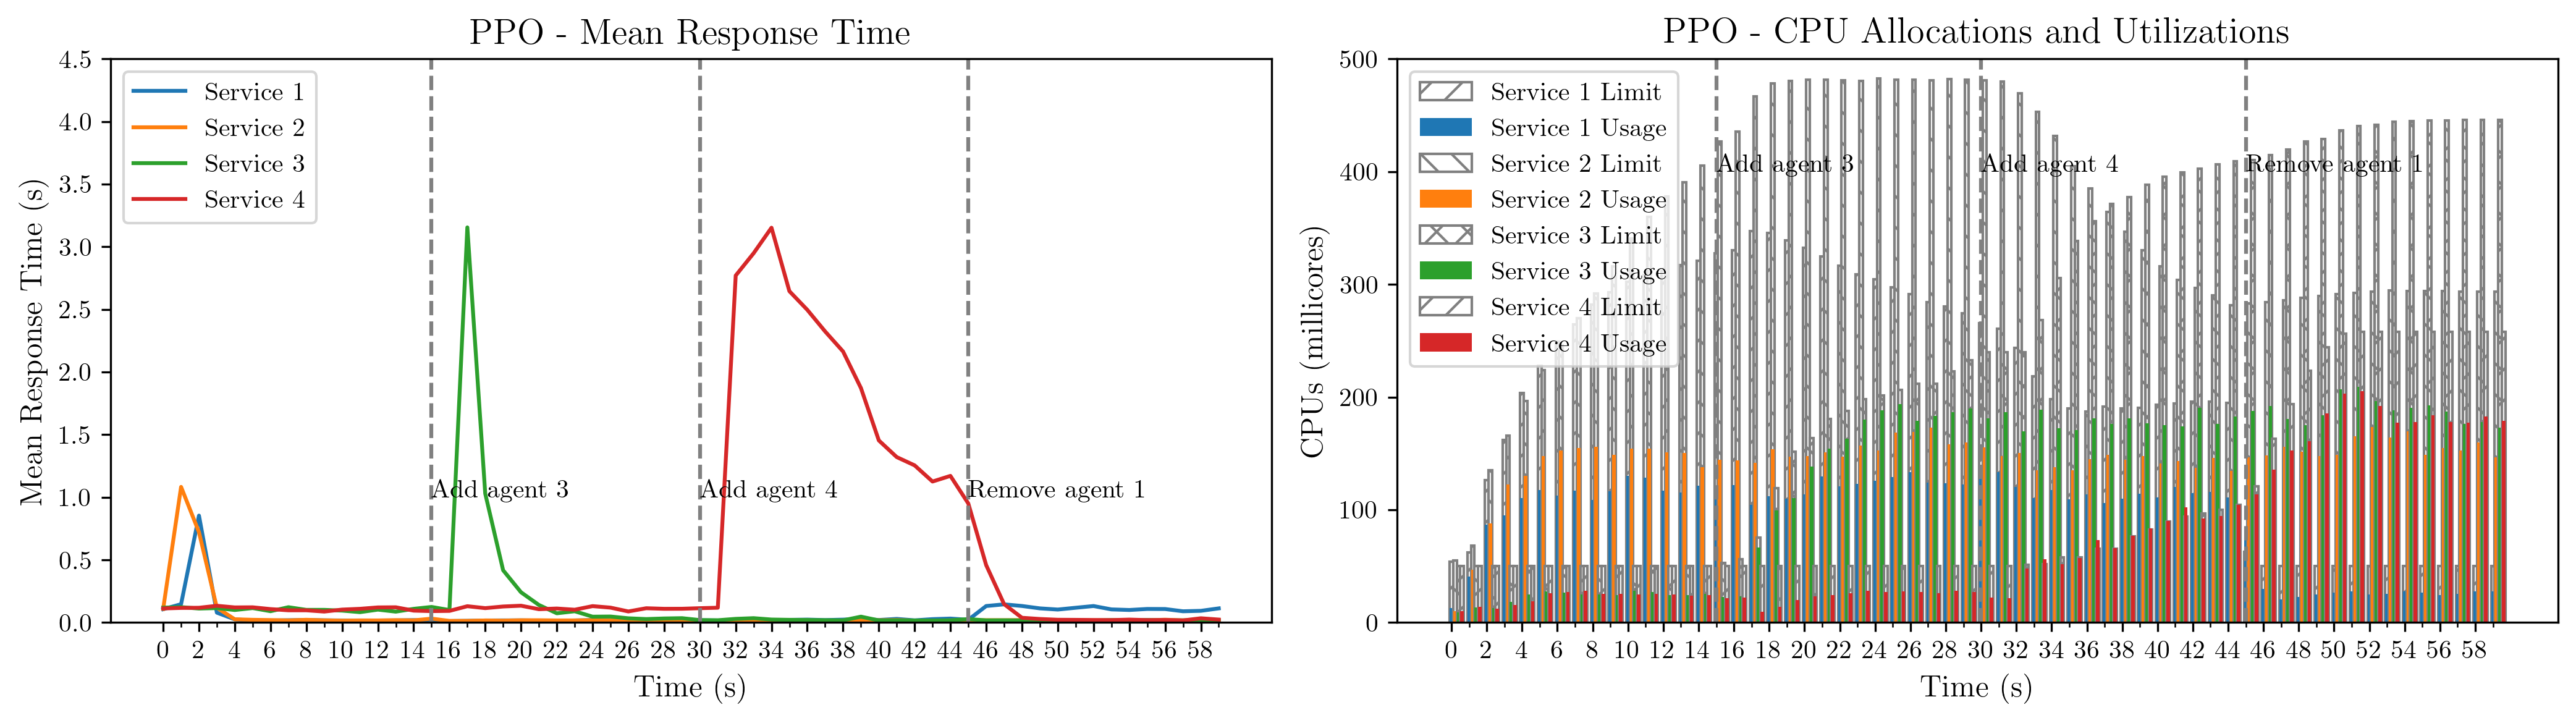

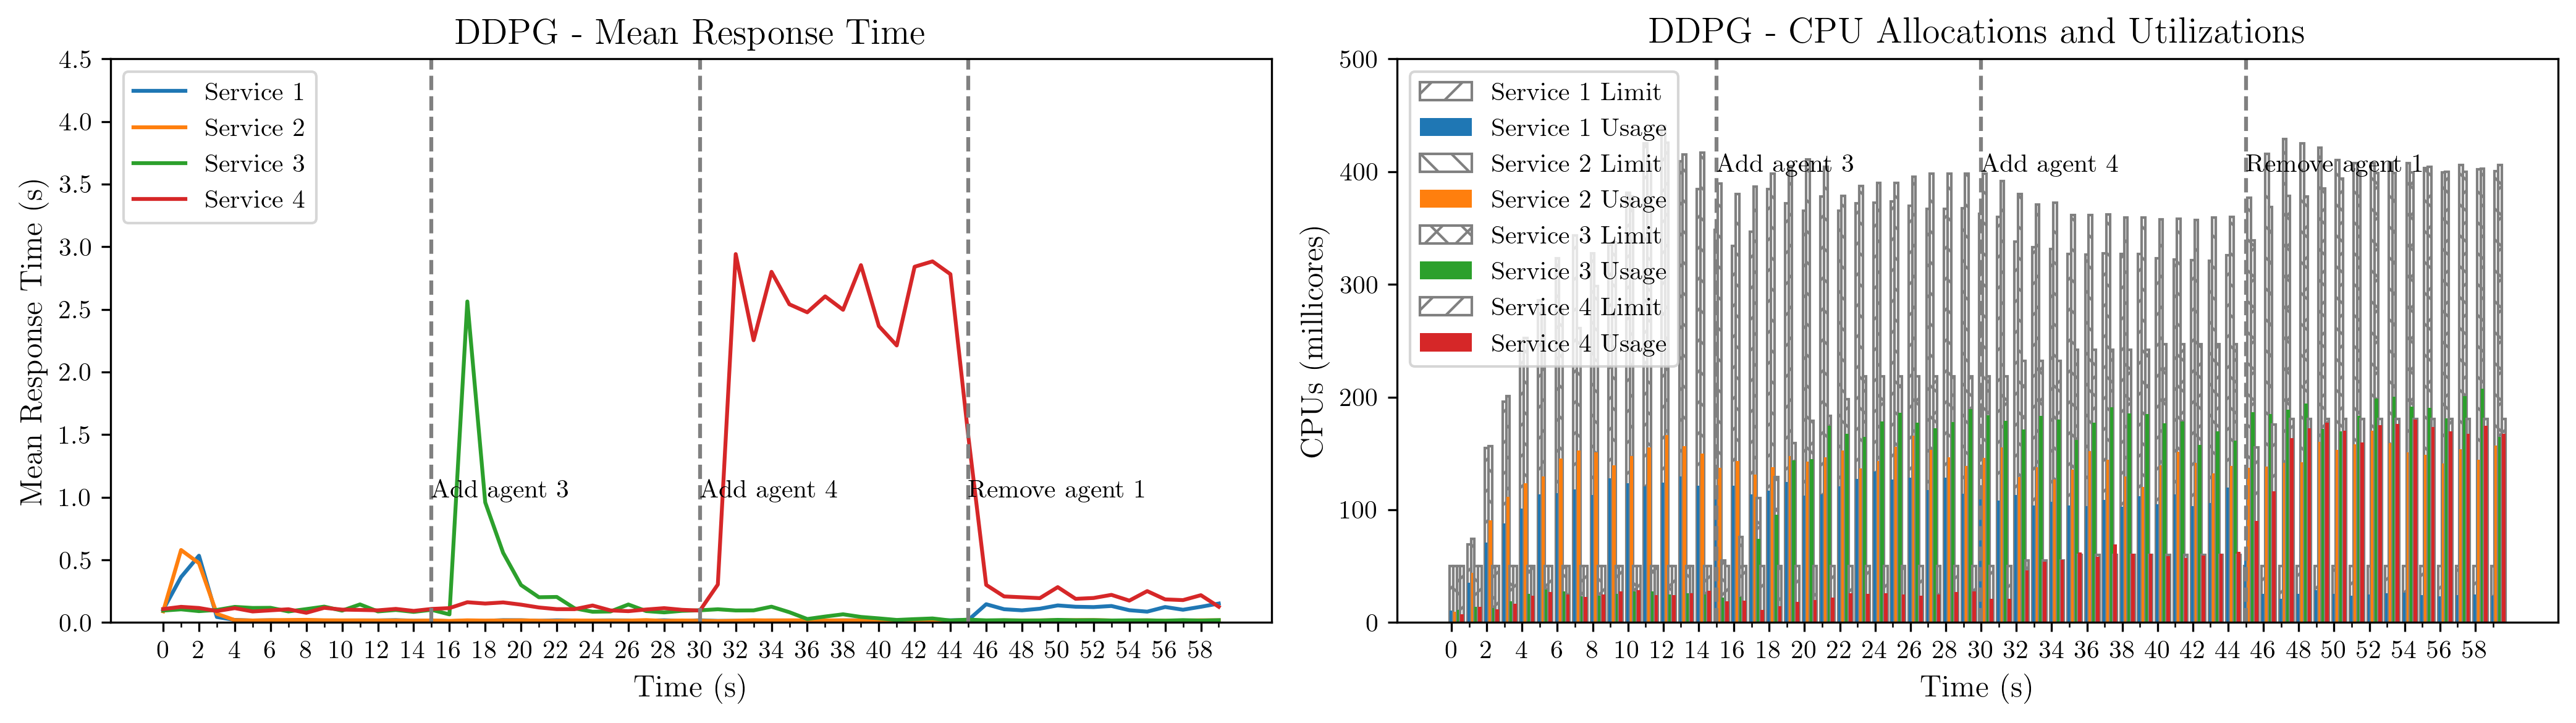

In [37]:
rts_ylimits = 4.5
crec_ylimits = 500

for idx, algorithm in enumerate(algorithms):
    response_times = mean_rts_alg[algorithm]
    container_recordings = mean_crec_alg[algorithm]
    time_axis = np.arange(len(container_recordings), dtype=int)
    
    # Plus one to sync
    first_quater_point = len(time_axis) // 4
    second_quater_point = 2 * len(time_axis) // 4
    third_quater_point = 3 * len(time_axis) // 4

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4), dpi=300)
    # fig, ax1 = plt.subplots(figsize=(7, 4), dpi=300)

    ### Plot 1: Mean Response Times ###
    for api_id, rts in response_times.items():
        ax1.plot(time_axis, rts, label=f'Service {api_id}')

    ax1.set_xlabel('Time (s)', fontsize=12)
    ax1.set_ylabel('Mean Response Time (s)', fontsize=12)
    if algorithm == 'thold':
        ax1.set_title(f'Heuristic - Mean Response Time', fontsize=14)
    else:
        ax1.set_title(f'{algorithm.upper()} - Mean Response Time', fontsize=14)
    ax1.legend(loc='upper left', fontsize=10)
    ax1.set_ylim(0, rts_ylimits)

    # Adding indicators at each third of the process
    ax1.axvline(first_quater_point, color='gray', linestyle='--')
    ax1.axvline(second_quater_point, color='gray', linestyle='--')
    ax1.axvline(third_quater_point, color='gray', linestyle='--')
    if algorithm != 'thold':
        ax1.text(first_quater_point, 1, 'Add agent 3', color='black', fontsize=10)
        ax1.text(second_quater_point, 1, 'Add agent 4', color='black', fontsize=10)
        ax1.text(third_quater_point, 1, 'Remove agent 1', color='black', fontsize=10)

    ax1.set_xticks(np.arange(min(time_axis), max(time_axis) + 1, 1), minor=True)  # Tick every 1 unit
    ax1.set_xticks(np.arange(min(time_axis), max(time_axis) + 1, 2))  # Tick every 5 units
    ax1.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))  # Ensure integer labels

    # fig, ax2 = plt.subplots(figsize=(7, 4), dpi=300)
    ### Plot 2: CPU Allocations and Utilizations ###
    hatches = ['//', '\\\\', 'xx', '//']  # Different hatching patterns
    for service_idx, container_recording in enumerate(zip(*container_recordings)):
        cpu_limits, cpu_usages, cpu_percentages = zip(*container_recording)

        # Shift bars slightly to avoid overlap
        x_pos = np.array(time_axis) + 0.2 * service_idx
        ax2.bar(x_pos, cpu_limits, width=0.2, label=f'Service {service_idx + 1} Limit',
                color='white', edgecolor='gray', hatch=hatches[service_idx])
        ax2.bar(x_pos, cpu_usages, width=0.2, label=f'Service {service_idx + 1} Usage')

    ax2.axvline(first_quater_point, color='gray', linestyle='--')
    ax2.axvline(second_quater_point, color='gray', linestyle='--')
    ax2.axvline(third_quater_point, color='gray', linestyle='--')
    if algorithm != 'thold':
        ax2.text(first_quater_point, 400, 'Add agent 3', color='black', fontsize=10)
        ax2.text(second_quater_point, 400, 'Add agent 4', color='black', fontsize=10)
        ax2.text(third_quater_point, 400, 'Remove agent 1', color='black', fontsize=10)

    ax2.set_xlabel('Time (s)', fontsize=12)
    ax2.set_ylabel('CPUs (millicores)', fontsize=12)
    if algorithm == 'thold':
        ax2.set_title(f'Heuristic - CPU Allocations and Utilizations', fontsize=14)
    else:
        ax2.set_title(f'{algorithm.upper()} - CPU Allocations and Utilizations', fontsize=14)
    ax2.legend(loc='upper left', fontsize=10)
    ax2.set_ylim(0, crec_ylimits)

    ax2.set_xticks(np.arange(min(time_axis), max(time_axis) + 1, 1), minor=True)  # Tick every 1 unit
    ax2.set_xticks(np.arange(min(time_axis), max(time_axis) + 1, 2))  # Tick every 5 units
    ax2.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))  # Ensure integer labels

    plt.tight_layout()
    plt.show()


NameError: name 'FuncFormatter' is not defined

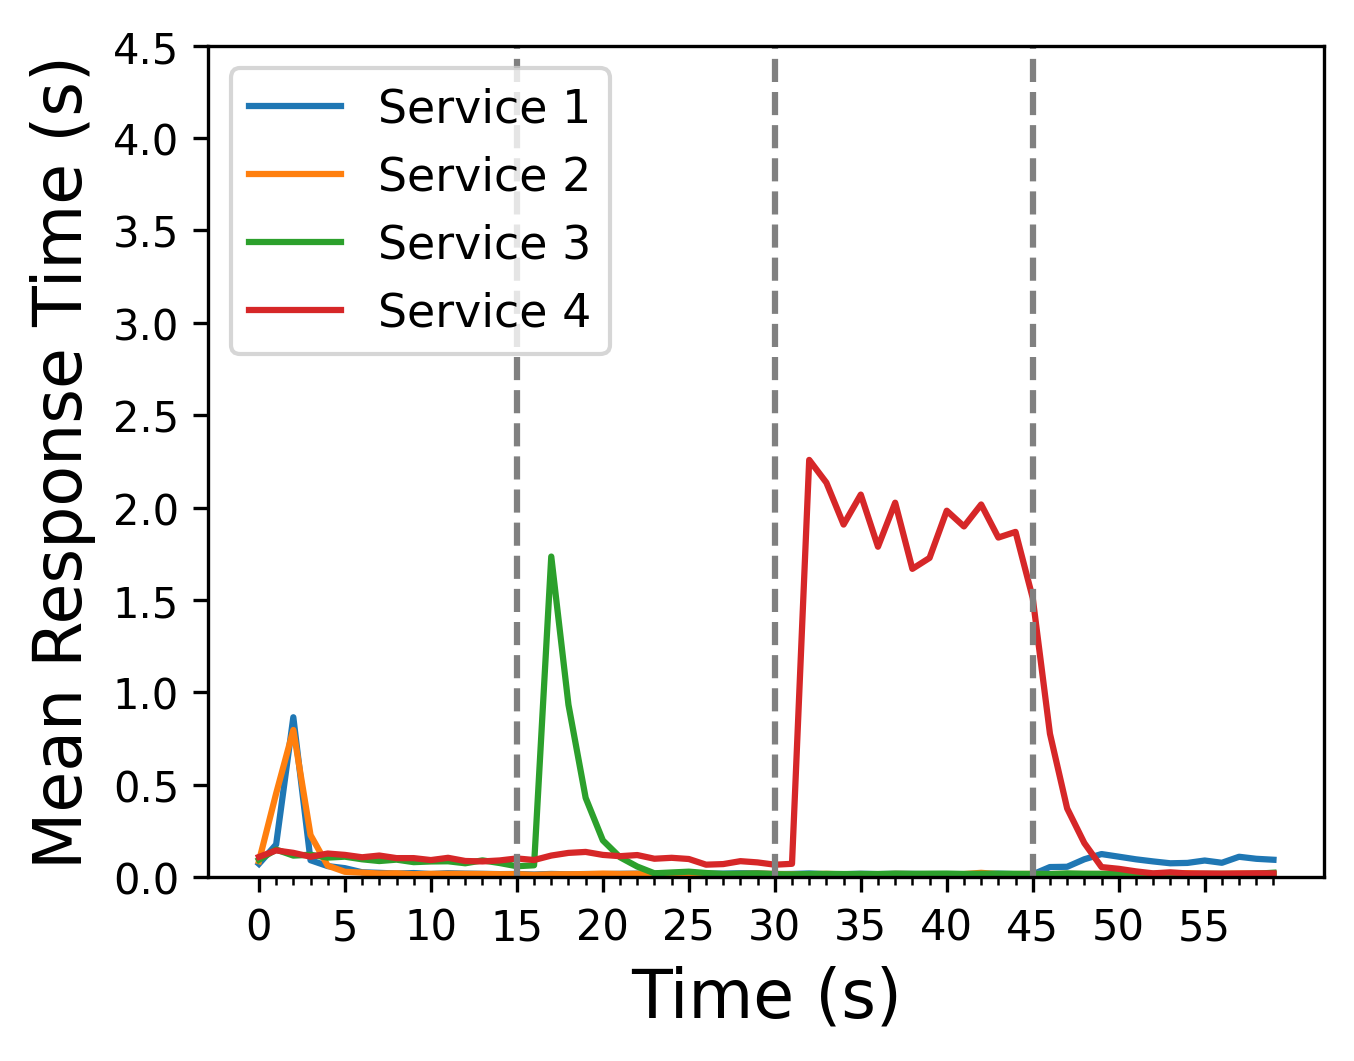

In [22]:

rts_ylimits = 4.5
crec_ylimits = 1000

# Function to select data every n seconds
def select_every_n_seconds(data, n):
    return [data[i] for i in range(0, len(data), n)]

for idx, algorithm in enumerate(algorithms):
    response_times = mean_rts_alg[algorithm]
    container_recordings = mean_crec_alg[algorithm]
    time_axis_rts = np.arange(len(response_times[1]), dtype=int)
    time_axis_crec = np.arange(0, len(container_recordings), 3)
    
    # Select container recordings every 2 seconds
    selected_container_recordings = select_every_n_seconds(container_recordings, 3)
    
    # Plus one to sync
    first_quarter_point = len(time_axis_rts) // 4
    second_quarter_point = 2 * len(time_axis_rts) // 4
    third_quarter_point = 3 * len(time_axis_rts) // 4

    fig, ax1 = plt.subplots(figsize=(4.8, 3.6), dpi=300)
    # fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4), dpi=300)

    ### Plot 1: Mean Response Times ###
    for api_id, rts in response_times.items():
        ax1.plot(time_axis_rts, rts, label=f'Service {api_id}')

    ax1.set_xlabel('Time (s)', fontsize=16)
    ax1.set_ylabel('Mean Response Time (s)', fontsize=16)
    # if algorithm == 'thold':
    #     ax1.set_title(f'Heuristic - Mean Response Time', fontsize=14)
    # else:
    #     ax1.set_title(f'{algorithm.upper()} - Mean Response Time', fontsize=14)
    ax1.legend(loc='upper left', fontsize=11)
    ax1.set_ylim(0, rts_ylimits)

    # Adding indicators at each quarter of the process
    ax1.axvline(first_quarter_point, color='gray', linestyle='--')
    ax1.axvline(second_quarter_point, color='gray', linestyle='--')
    ax1.axvline(third_quarter_point, color='gray', linestyle='--')
    if algorithm != 'thold':
        ax1.text(first_quarter_point + 0.5, 4, 'Add A. 3', color='black', fontsize=12)
        ax1.text(second_quarter_point + 0.5, 4, 'Add A. 4', color='black', fontsize=12)
        ax1.text(third_quarter_point + 0.5, 4, 'Remove A. 1', color='black', fontsize=12)

    ax1.set_xticks(np.arange(min(time_axis_rts), max(time_axis_rts) + 1, 1), minor=True)  # Tick every 1 unit
    ax1.set_xticks(np.arange(min(time_axis_rts), max(time_axis_rts) + 1, 5))  # Tick every 5 units
    ax1.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))  # Ensure integer labels
        
    ax1.tick_params(axis='both', which='major', labelsize=12)
    ax1.tick_params(axis='both', which='minor', labelsize=10)

    plt.tight_layout()
    plt.savefig(f'figures/scalable_agents/{algorithm}_response_times.pdf')
    # plt.show()
    plt.close(fig)

    fig, ax2 = plt.subplots(figsize=(4.8, 3.6), dpi=300)
    ### Plot 2: CPU Allocations and Utilizations ###
    hatches = ['//', '\\\\', 'xx', '//']  # Different hatching patterns
    for service_idx, container_recording in enumerate(zip(*selected_container_recordings)):
        cpu_limits, cpu_usages, cpu_percentages = zip(*container_recording)

        # Shift bars slightly to avoid overlap
        x_pos = np.array(time_axis_crec) + 0.6 * service_idx
        ax2.bar(x_pos, cpu_limits, width=0.6, label=f'S{service_idx + 1} Limit',
                color='white', edgecolor='gray', hatch=hatches[service_idx])
        ax2.bar(x_pos, cpu_usages, width=0.6, label=f'S{service_idx + 1} Usage')

    ax2.axvline(first_quarter_point, color='gray', linestyle='--')
    ax2.axvline(second_quarter_point, color='gray', linestyle='--')
    ax2.axvline(third_quarter_point, color='gray', linestyle='--')
    if algorithm != 'thold':
        ax2.text(first_quarter_point + 0.5, 450, 'Add A. 3', color='black', fontsize=12)
        ax2.text(second_quarter_point + 0.5, 450, 'Add A. 4', color='black', fontsize=12)
        ax2.text(third_quarter_point + 0.5, 450, 'Remove A. 1', color='black', fontsize=12)

    ax2.set_xlabel('Time (s)', fontsize=16)
    ax2.set_ylabel('CPUs (millicores)', fontsize=16)
    # if algorithm == 'thold':
    #     ax2.set_title(f'Heuristic - CPU Allocations and Utilizations', fontsize=14)
    # else:
    #     ax2.set_title(f'{algorithm.upper()} - CPU Allocations and Utilizations', fontsize=14)
    ax2.legend(loc='upper left', fontsize=11)
    ax2.set_ylim(0, crec_ylimits)

    ax2.set_xticks(np.arange(min(time_axis_crec), max(time_axis_crec) + 1, 1), minor=True)  # Tick every 2 units
    ax2.set_xticks(np.arange(min(time_axis_crec), max(time_axis_crec) + 1, 5))  # Tick every 10 units
    ax2.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))  # Ensure integer labels

    ax2.tick_params(axis='both', which='major', labelsize=12)
    ax2.tick_params(axis='both', which='minor', labelsize=10)

    plt.tight_layout()
    plt.savefig(f'figures/scalable_agents/{algorithm}_utilizations.pdf')
    # plt.show()
    plt.close(fig)

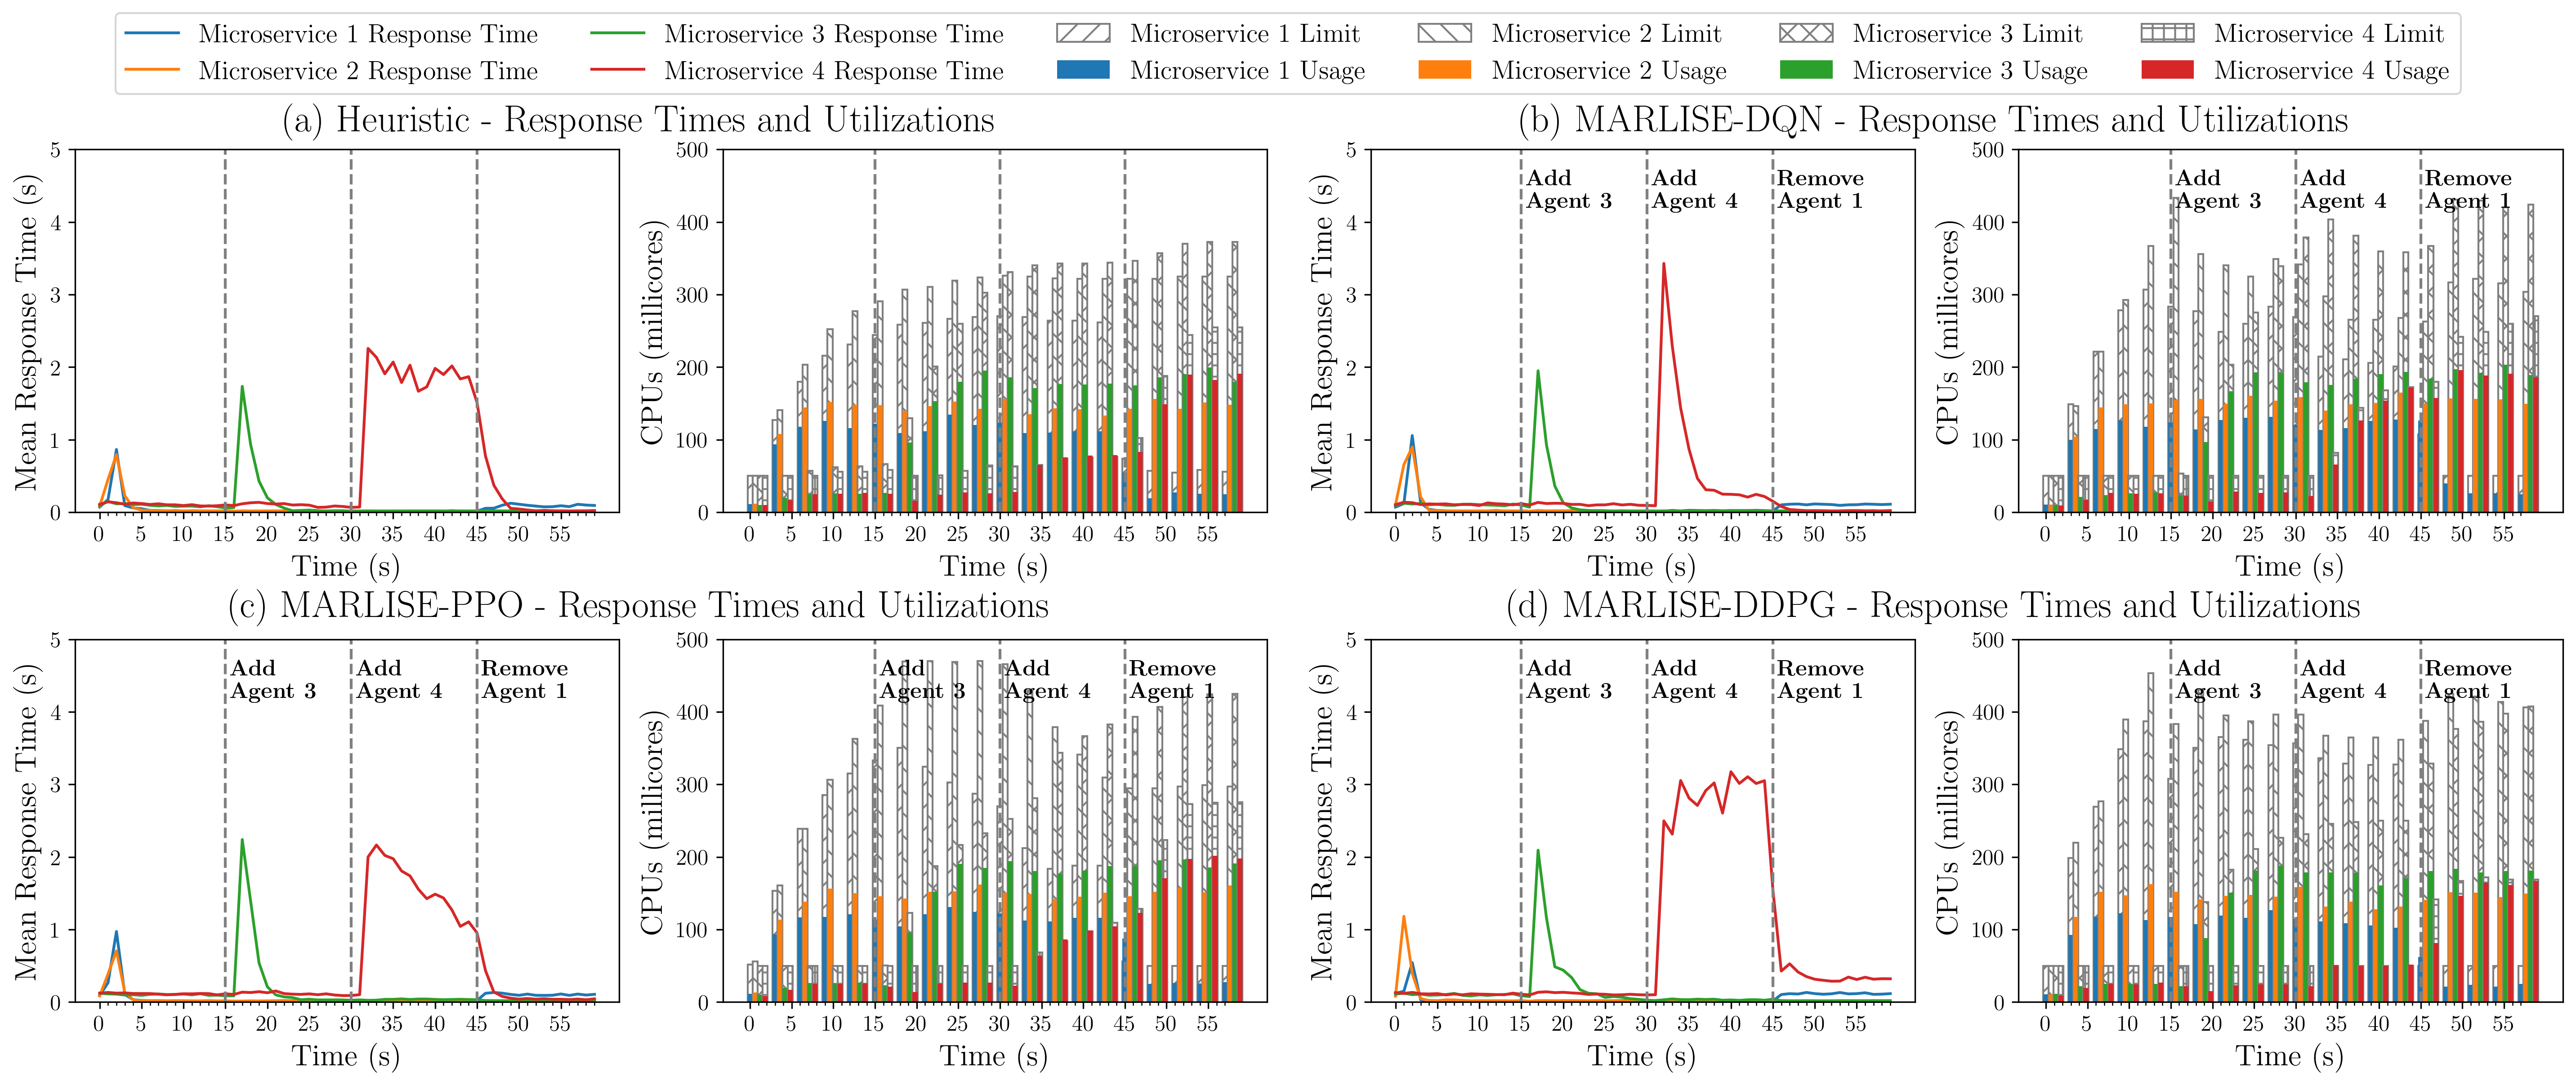

In [7]:

rts_ylimits = 5.0
crec_ylimits = 500

fig, axs = plt.subplots(2, 4, figsize=(19.2, 7.2), dpi=300)  # Create a 2x4 grid of subplots

labels = ['a', 'b', 'c', 'd']

def select_every_n_seconds(data, n):
    return [data[i] for i in range(0, len(data), n)]

for idx, algorithm in enumerate(algorithms):
    response_times = mean_rts_alg[algorithm]
    container_recordings = mean_crec_alg[algorithm]
    time_axis_rts = np.arange(len(container_recordings), dtype=int)
    time_axis_crec = np.arange(0, len(container_recordings), 3)

    time_axis_crec = np.arange(0, len(container_recordings), 3)
    selected_container_recordings = select_every_n_seconds(container_recordings, 3)
    
    # Plus one to sync
    # third_way_point = len(time_axis_rts) // 3 + 1
    # two_third_way_point = 2 * len(time_axis_rts) // 3 + 1
    first_quarter_point = len(time_axis_rts) // 4
    second_quarter_point = 2 * len(time_axis_rts) // 4
    third_quarter_point = 3 * len(time_axis_rts) // 4

    row, col = divmod(idx, 2)

    ### Plot 1: Mean Response Times ###
    ax1 = axs[row, col * 2]
    for api_id, rts in response_times.items():
        ax1.plot(time_axis_rts, rts, label=f'Microservice {api_id} Response Time')

    ax1.set_xlabel('Time (s)', fontsize=16)
    ax1.set_ylabel('Mean Response Time (s)', fontsize=16)
    ax1.set_ylim(0, rts_ylimits)

    # Adding indicators at each third of the process
    ax1.axvline(first_quarter_point, color='gray', linestyle='--')
    ax1.axvline(second_quarter_point, color='gray', linestyle='--')
    ax1.axvline(third_quarter_point, color='gray', linestyle='--')
    if algorithm != 'thold':
        ax1.text(first_quarter_point + 0.5, 4.5, r'\noindent\textbf{Add \\ Agent 3}', color='black', fontsize=12)
        ax1.text(second_quarter_point + 0.5, 4.5, r'\noindent\textbf{Add \\ Agent 4}', color='black', fontsize=12)
        ax1.text(third_quarter_point + 0.5, 4.5, r'\noindent\textbf{Remove \\ Agent 1}', color='black', fontsize=12)

    ax1.set_xticks(np.arange(min(time_axis_rts), max(time_axis_rts) + 1, 1), minor=True)  # Tick every 1 unit
    ax1.set_xticks(np.arange(min(time_axis_rts), max(time_axis_rts) + 1, 5))  # Tick every 2 units
    ax1.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))  # Ensure integer labels

    ax1.tick_params(axis='both', which='major', labelsize=12)
    ax1.tick_params(axis='both', which='minor', labelsize=10)

    # Add label to the subplot
    # if algorithm == 'thold':
    #     fig.text(-0.1, 1.1, f'({labels[idx]}) Heuristic - Response Times and Utilizations', transform=ax1.transAxes, size=20, weight='bold')
    # else:
    #     fig.text(-0.1, 1.1, f'({labels[idx]}) {algorithm.upper()} - Response Times and Utilizations', transform=ax1.transAxes, size=20, weight='bold')

    ### Plot 2: CPU Allocations and Utilizations ###
    ax2 = axs[row, col * 2 + 1]
    hatches = ['//', '\\\\', 'xx', '++'] # Different hatching patterns
    for service_idx, container_recording in enumerate(zip(*selected_container_recordings)):
        cpu_limits, cpu_usages, cpu_percentages = zip(*container_recording)

        # Shift bars slightly to avoid overlap
        x_pos = np.array(time_axis_crec) + 0.6  * service_idx
        ax2.bar(x_pos, cpu_limits, width=0.6 , label=f'Microservice {service_idx + 1} Limit',
                color='white', edgecolor='gray', hatch=hatches[service_idx])
        ax2.bar(x_pos, cpu_usages, width=0.6 , label=f'Microservice {service_idx + 1} Usage')

    ax2.set_xlabel('Time (s)', fontsize=16)
    ax2.set_ylabel('CPUs (millicores)', fontsize=16)
    ax2.set_ylim(0, crec_ylimits)

    ax2.axvline(first_quarter_point, color='gray', linestyle='--')
    ax2.axvline(second_quarter_point, color='gray', linestyle='--')
    ax2.axvline(third_quarter_point, color='gray', linestyle='--')
    if algorithm != 'thold':
        ax2.text(first_quarter_point + 0.5, 450, r'\noindent\textbf{Add \\ Agent 3}', color='black', fontsize=12)
        ax2.text(second_quarter_point + 0.5, 450, r'\noindent\textbf{Add \\ Agent 4}', color='black', fontsize=12)
        ax2.text(third_quarter_point + 0.5, 450, r'\noindent\textbf{Remove \\ Agent 1}', color='black', fontsize=12)

    ax2.set_xticks(np.arange(min(time_axis_crec), max(time_axis_crec) + 1, 1), minor=True)  # Tick every 1 unit
    ax2.set_xticks(np.arange(min(time_axis_crec), max(time_axis_crec) + 1, 5))  # Tick every 2 units
    ax2.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))  # Ensure integer labels

    ax2.tick_params(axis='both', which='major', labelsize=12)
    ax2.tick_params(axis='both', which='minor', labelsize=10)

    # Add label to the subplot
    # ax2.text(-0.1, 1.1, f'({labels[idx]})', transform=ax2.transAxes, size=20, weight='bold')

    if algorithm == 'thold':
        fig.text(0.25 + (col * 0.5), 1 - (row * 0.5) - 0.01, f'({labels[idx]}) Heuristic - Response Times and Utilizations', 
                 ha='center', size=20, weight='bold')
    else:
        fig.text(0.25 + (col * 0.5), 1 - (row * 0.5) - 0.01, f'({labels[idx]}) {"MARLISE-" + algorithm.upper()} - Response Times and Utilizations', 
                 ha='center', size=20, weight='bold')

ax1handles, ax1labels = ax1.get_legend_handles_labels()
ax2handles, ax2labels = ax2.get_legend_handles_labels()
fig.legend(handles=ax1handles + ax2handles, labels=ax1labels + ax2labels, loc='upper center', fontsize=14, 
           ncol=len(ax1handles + ax2handles) - 6, bbox_to_anchor=(0.5, 1.125))

plt.tight_layout()
fig.subplots_adjust(hspace=0.35)

plt.savefig('figures/all_scalability.pdf', bbox_inches='tight')
plt.show()
plt.close(fig)